# Most Commonly Used sklearn Components in Open Source Repos

### Load and Transform Data

In [65]:
import pickle
import pandas as pd
from collections import Counter

from analysis_utils import extract_repo_info, count_component_occurrences, plot_component_popularity

In [2]:
ipynb_df = pd.read_parquet('./sklearn_components_counts.parquet')

In [3]:
ipynb_df.rename(columns={'module': 'library'}, inplace=True)
ipynb_df = extract_repo_info(ipynb_df)
ipynb_df

,repo,filename,library,component_type,component_name,count
0,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lgb_i...,sklearn,function,plot_tree,1
1,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lgb_i...,sklearn,function,train_test_split,3
2,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,attribute,classes_,1
3,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,attribute,coef_,3
4,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,class,ColumnTransformer,1
...,...,...,...,...,...,...
42254,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,function,roc_curve,1
42255,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,fit,4
42256,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict,6
42257,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict_proba,6


In [4]:
with open('/home/tobiasz/Repos/python-libraries-stats/jupyter-notebook-repos.pickle', 'rb') as f:
    jupyter_repos = pickle.load(f)
    del jupyter_repos['saved_dates']
jupyter_repos

{'LibraryOfCongress/newspaper-navigator': {'id': 231426741,
  'name': 'newspaper-navigator',
  'full_name': 'LibraryOfCongress/newspaper-navigator',
  'html_url': 'https://github.com/LibraryOfCongress/newspaper-navigator',
  'created_at': '2020-01-02T17:16:06Z',
  'updated_at': '2024-04-23T03:22:29Z',
  'size': 1604160,
  'stargazers_count': 224,
  'topics': [],
  'watchers': 224,
  'license': {'key': 'unlicense',
   'name': 'The Unlicense',
   'spdx_id': 'Unlicense',
   'url': 'https://api.github.com/licenses/unlicense',
   'node_id': 'MDc6TGljZW5zZTE1'}},
 'raveendarv/AppliedAiCourse-AssignmentAndNotes': {'id': 231320844,
  'name': 'AppliedAiCourse-AssignmentAndNotes',
  'full_name': 'raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'html_url': 'https://github.com/raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'created_at': '2020-01-02T06:25:28Z',
  'updated_at': '2024-04-27T11:24:21Z',
  'size': 341645,
  'stargazers_count': 169,
  'topics': [],
  'watchers': 169,
  'license': {

In [42]:
records = []
for repo, details in jupyter_repos.items():
    record = {
        # 'repo': repo,
        # 'id': details['id'],
        'name': details['name'],
        'full_name': details['full_name'],
        # 'html_url': details['html_url'],
        # 'created_at': details['created_at'],
        # 'updated_at': details['updated_at'],
        'size': details['size'],
        'stargazers_count': details['stargazers_count'],
        # 'watchers': details['watchers'],
        # 'license_key': details['license']['key'] if details['license'] else None,
        # 'license_name': details['license']['name'] if details['license'] else None,
        # 'license_spdx_id': details['license']['spdx_id'] if details['license'] else None,
        # 'license_url': details['license']['url'] if details['license'] else None,
        'topics': details['topics'] if 'topics' in details else []
    }
    records.append(record)

jupyter_repos_df = pd.DataFrame(records)
jupyter_repos_df = jupyter_repos_df[jupyter_repos_df['full_name'].isin(ipynb_df['repo'])]
jupyter_repos_df

,name,full_name,size,stargazers_count,topics
1,AppliedAiCourse-AssignmentAndNotes,raveendarv/AppliedAiCourse-AssignmentAndNotes,341645,169,[]
14,mslearn-aml-labs,MicrosoftDocs/mslearn-aml-labs,524,200,[]
17,pulearn,pulearn/pulearn,1406,200,[]
23,causal_book,YutaroOgawa/causal_book,950,108,[]
25,100DaysofMLCode,NishkarshRaj/100DaysofMLCode,43232,313,"[100daysofcode, 100daysofmlcode, artificial-in..."
...,...,...,...,...,...
3546,GML2023,xbresson/GML2023,80704,349,[]
3556,youtube-rag,svpino/youtube-rag,1585,125,[]
3558,Machine_Learning_Sklearn_Examples,solidglue/Machine_Learning_Sklearn_Examples,3568,103,"[machine-learning, sklearn]"
3576,cookbook,google-gemini/cookbook,8117,2268,"[gemini, gemini-api]"


In [43]:
top_100_repos_names_ipynb = jupyter_repos_df.sort_values(ascending=False, by='stargazers_count').head(100)['full_name']
top_100_repos_ipynb = ipynb_df[ipynb_df['repo'].isin(top_100_repos_names_ipynb)]

In [66]:
all_topics = [topic for sublist in jupyter_repos_df['topics'] for topic in sublist]
Counter(all_topics)

Counter({'machine-learning': 151,
         'deep-learning': 114,
         'python': 106,
         'data-science': 58,
         'pytorch': 44,
         'nlp': 38,
         'tensorflow': 25,
         'ai': 25,
         'natural-language-processing': 23,
         'artificial-intelligence': 22,
         'hacktoberfest': 22,
         'python3': 21,
         'jupyter-notebook': 21,
         'scikit-learn': 21,
         'computer-vision': 18,
         'neural-networks': 16,
         'transformers': 16,
         'open-source': 16,
         'pandas': 15,
         'bert': 14,
         'data-analysis': 13,
         'mlops': 12,
         'dataset': 11,
         'keras': 11,
         'neural-network': 11,
         'classification': 10,
         'data-visualization': 10,
         'machine-learning-algorithms': 10,
         'reinforcement-learning': 10,
         'deeplearning': 10,
         'deep-neural-networks': 10,
         'embeddings': 9,
         'numpy': 9,
         'statistics': 9,
         '

### By Number of Repos they Appear in

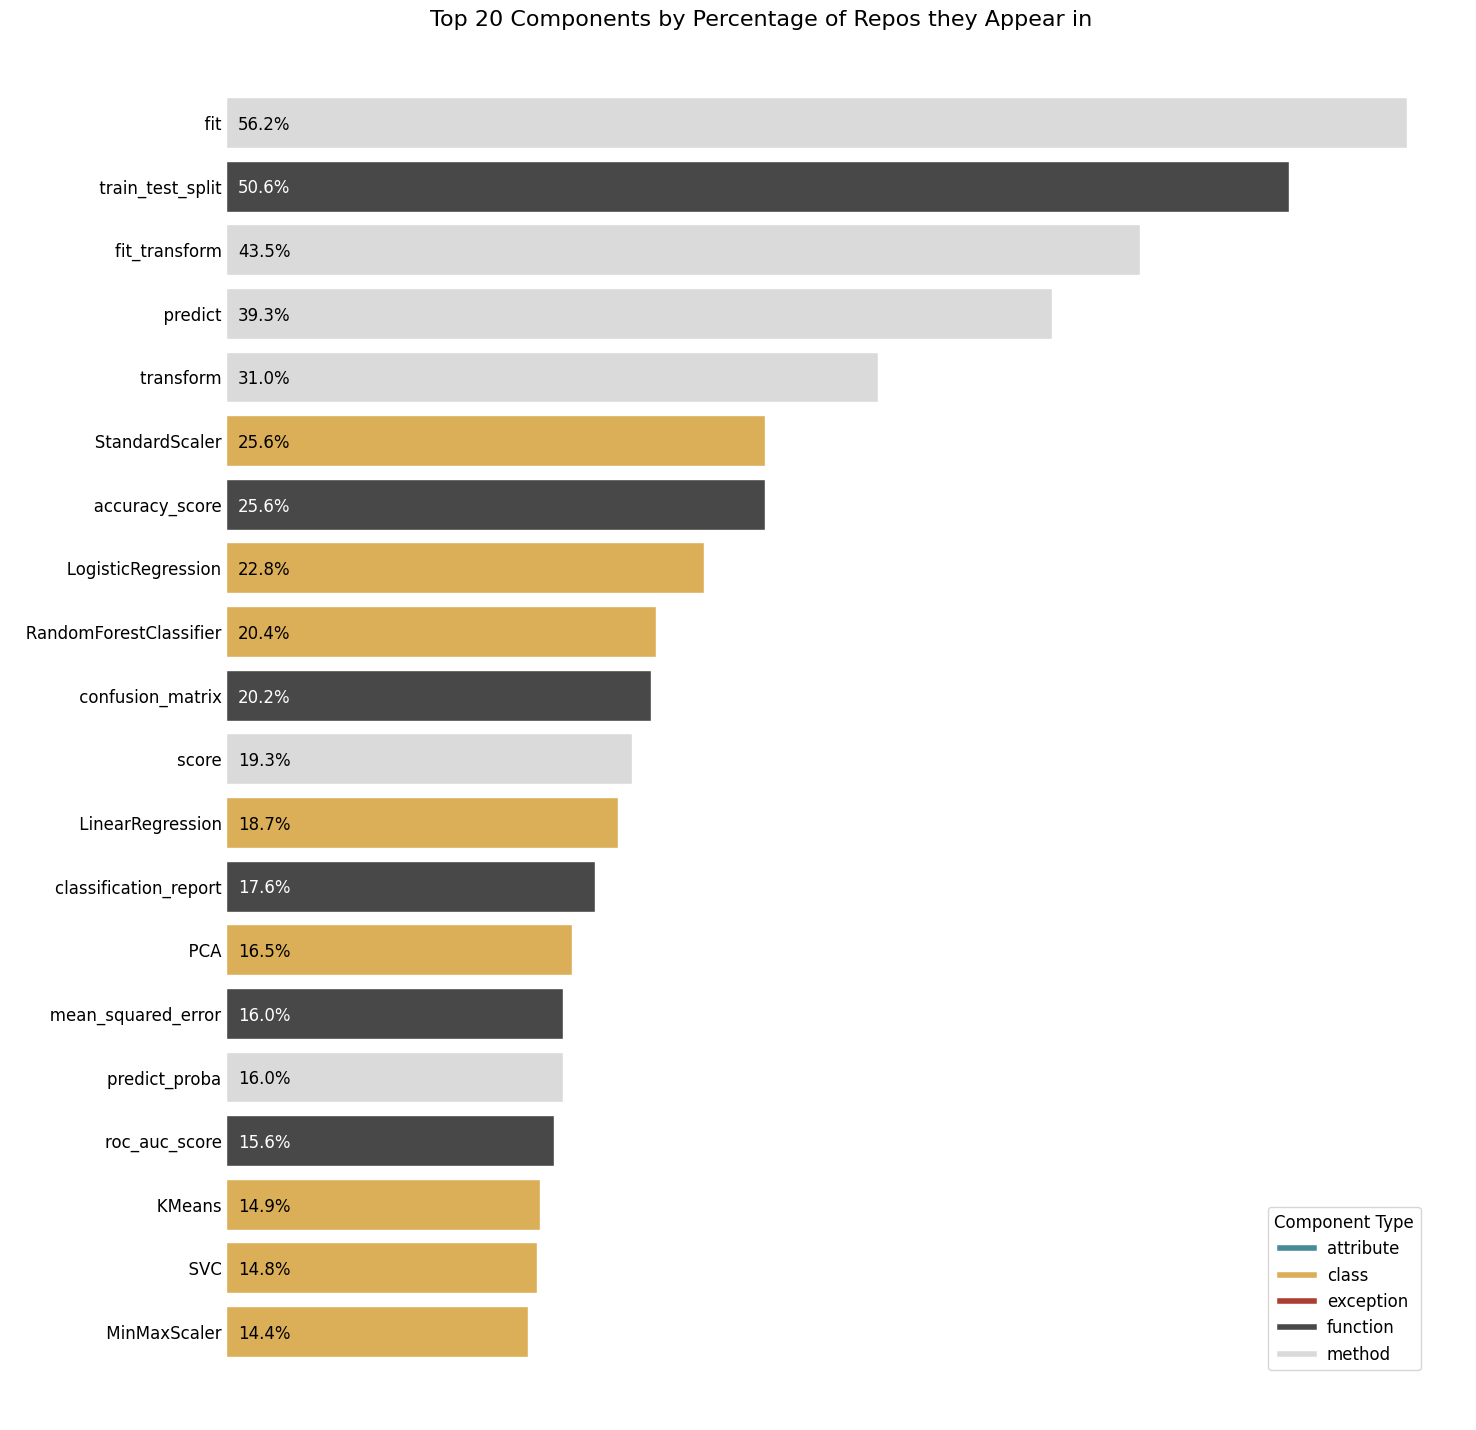

In [51]:
repo_count = ipynb_df['repo'].nunique()
component_counts = count_component_occurrences(ipynb_df, within_column='repo')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Repos they Appear in', divide_by_to_show_prc=repo_count, top_n=20)

In [55]:
jupyter_repos_df['size'].mean()

171392.96779141104

In [58]:
jupyter_repos_df[jupyter_repos_df['full_name'].isin(top_100_repos_names_ipynb)]['size'].mean()

204736.67

Bigger usage of Pipeline, OneHotEncoder and _coef in top star repos isn't because the projects are (much) bigger

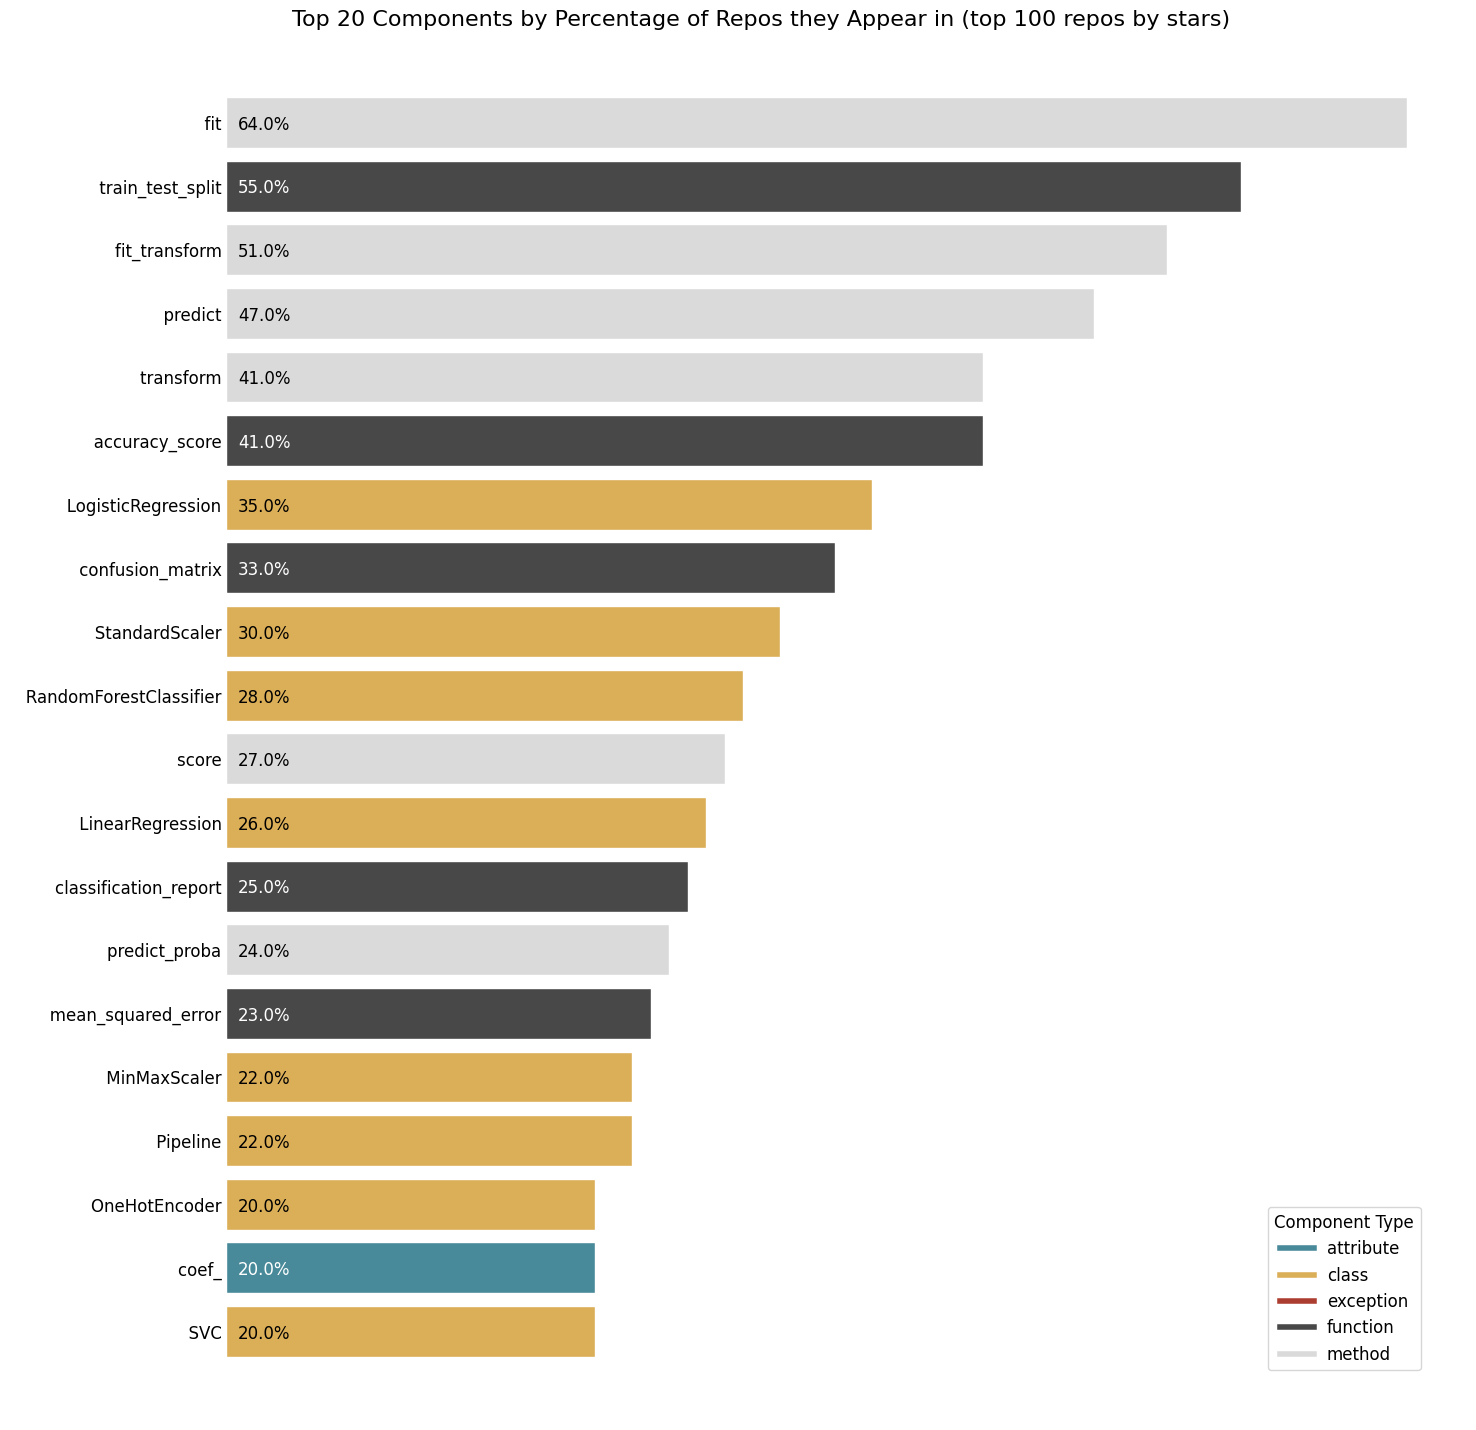

In [52]:
repo_count = top_100_repos_ipynb['repo'].nunique()
component_counts = count_component_occurrences(top_100_repos_ipynb, within_column='repo')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Repos they Appear in (top 100 repos by stars)', divide_by_to_show_prc=repo_count, top_n=20)

### By number of Files they Appear in

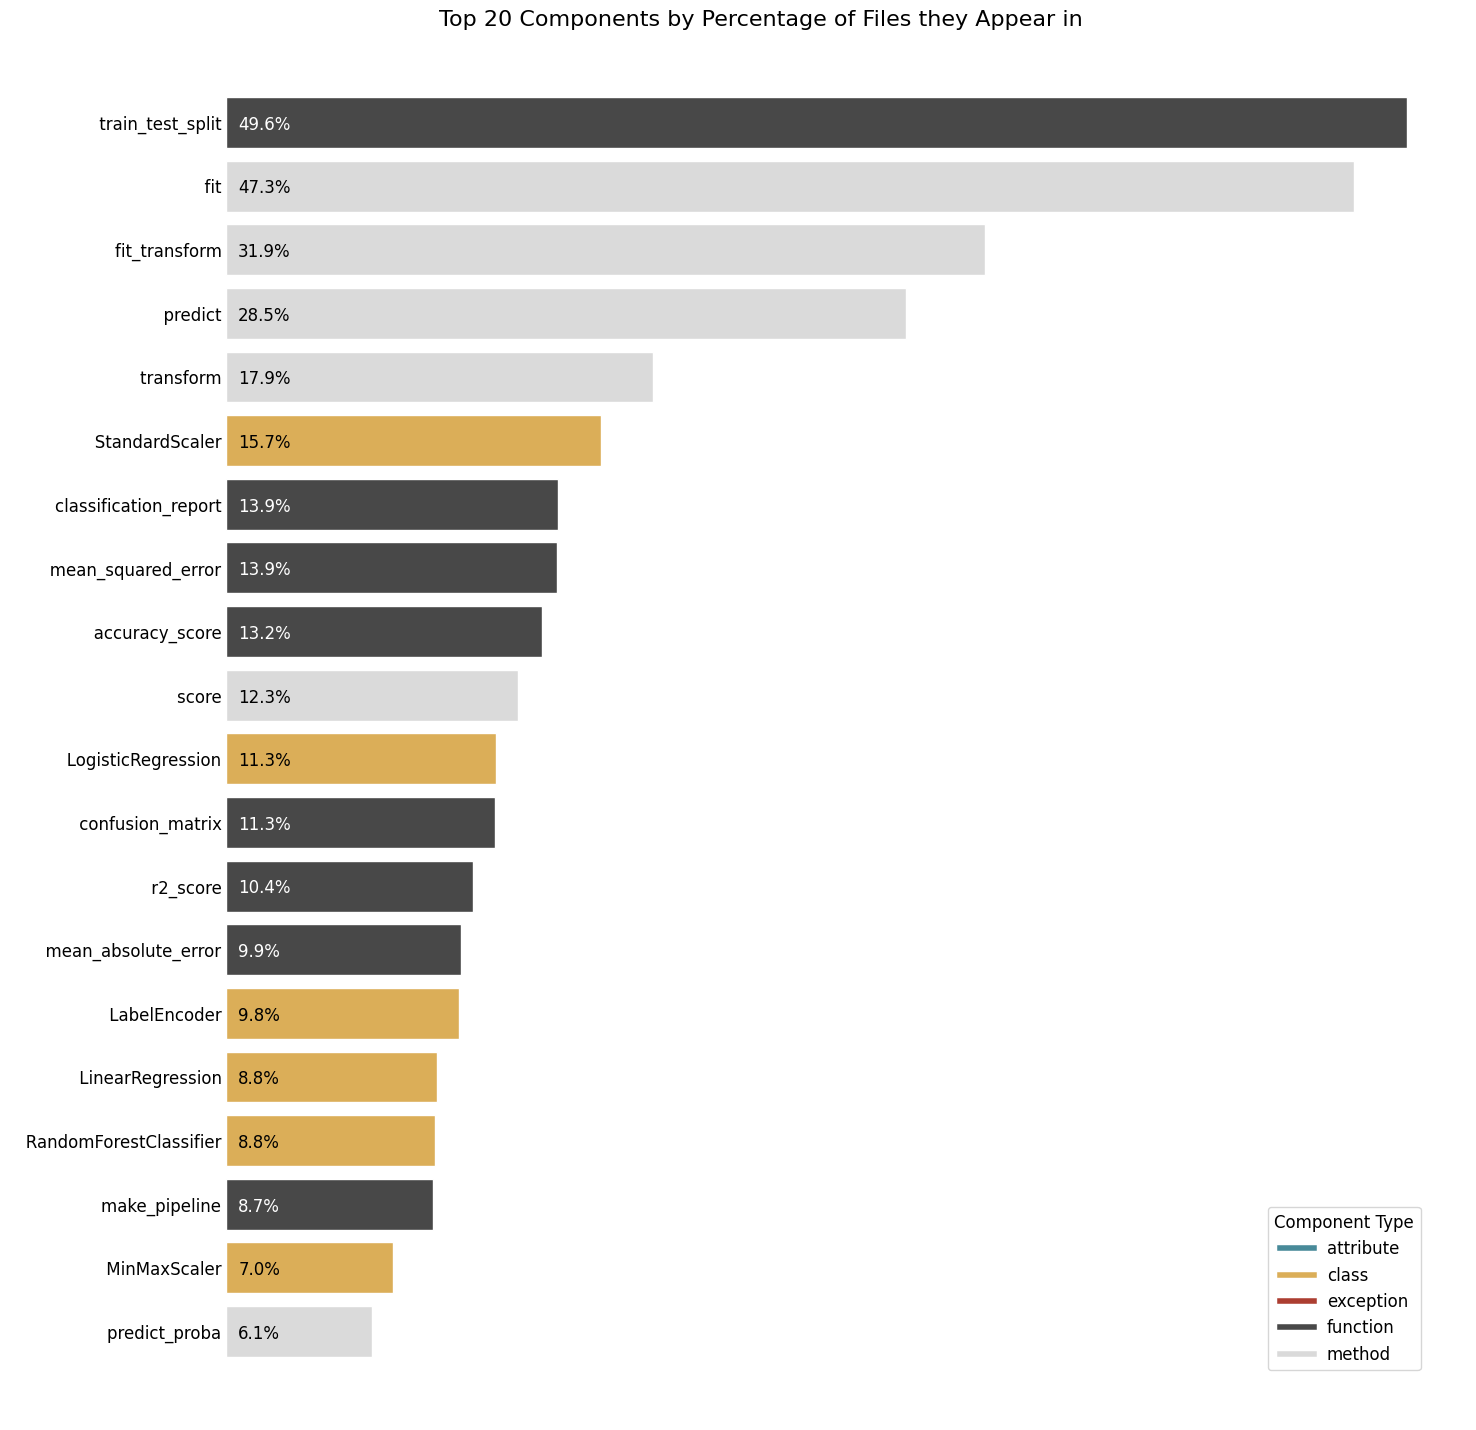

In [61]:
file_count = ipynb_df['filename'].nunique()
component_counts = count_component_occurrences(ipynb_df, within_column='filename')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Files they Appear in', divide_by_to_show_prc=file_count, top_n=20)

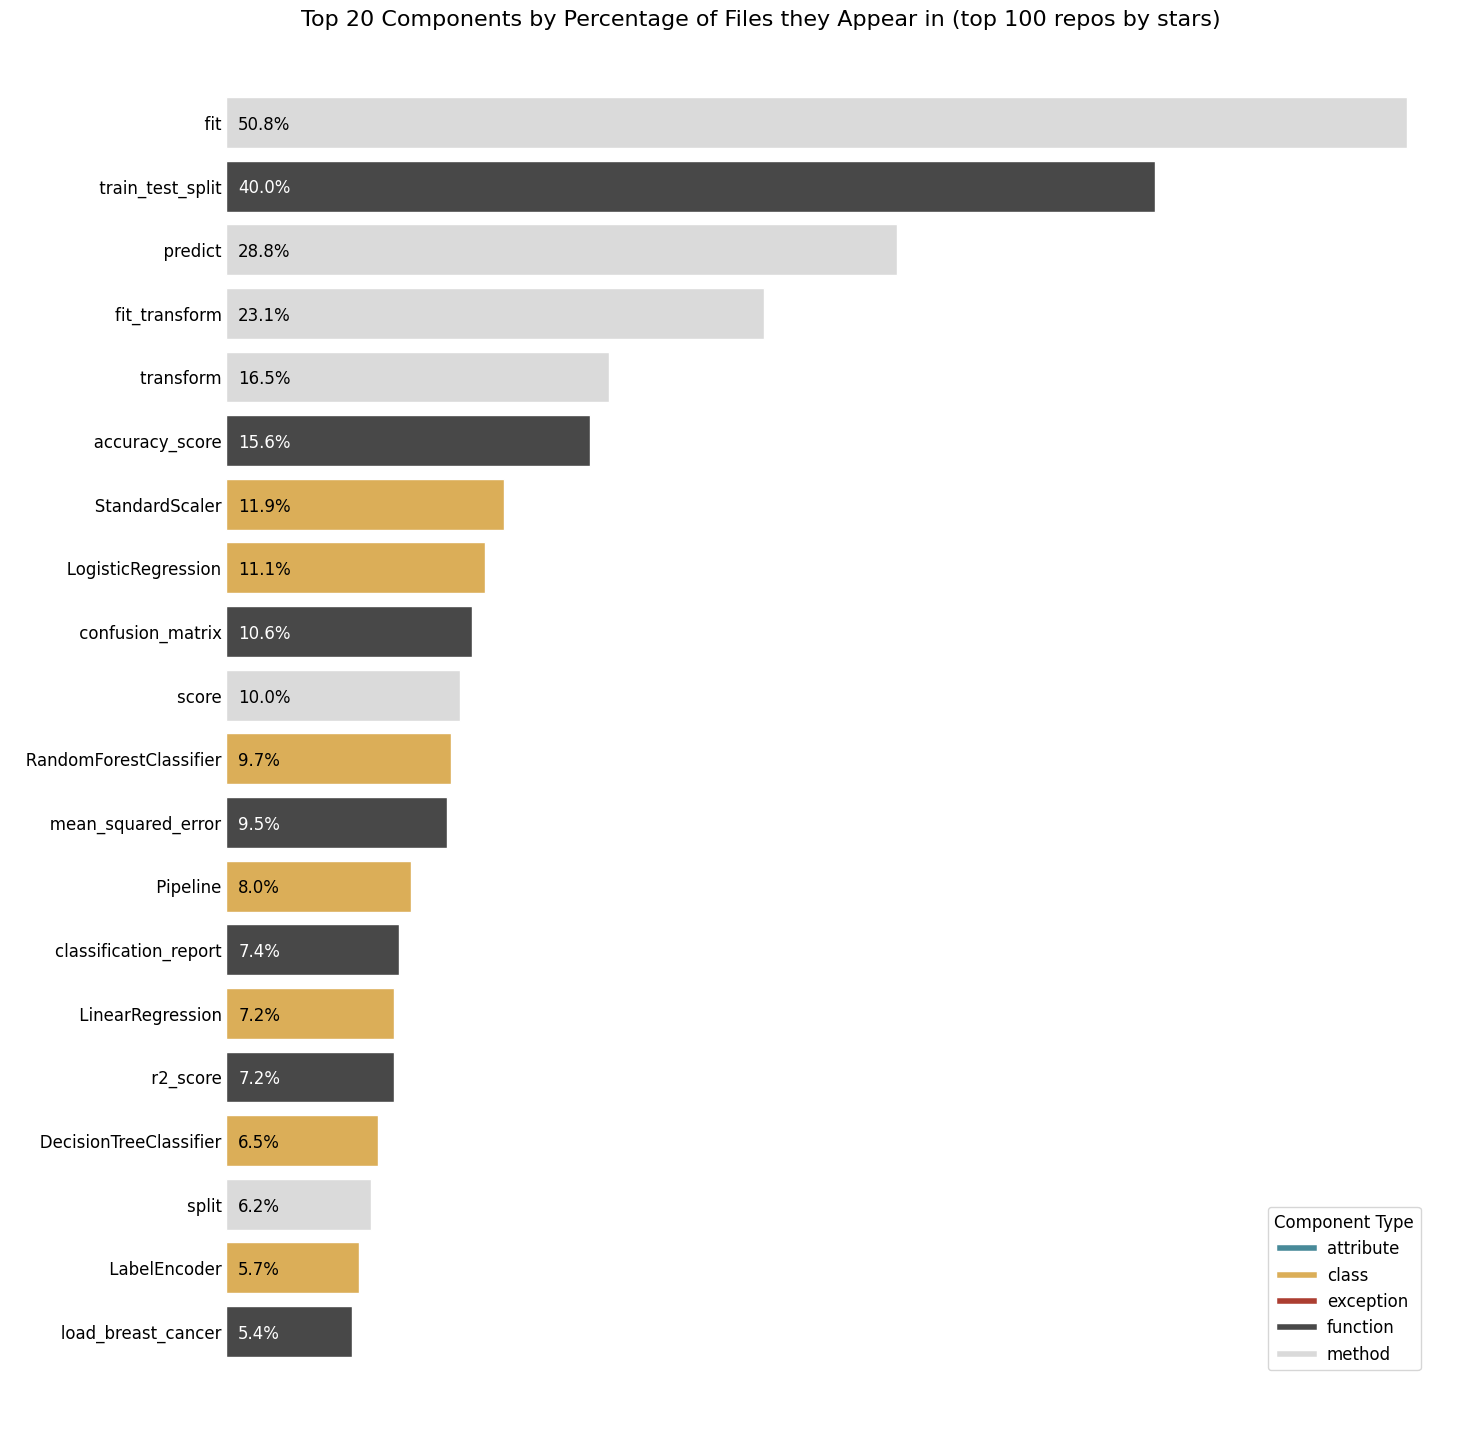

In [60]:
file_count = top_100_repos_ipynb['filename'].nunique()
component_counts = count_component_occurrences(top_100_repos_ipynb, within_column='filename')
plot_component_popularity(component_counts, 'Top 20 Components by Percentage of Files they Appear in (top 100 repos by stars)', divide_by_to_show_prc=file_count, top_n=20)

### Raw Numbers

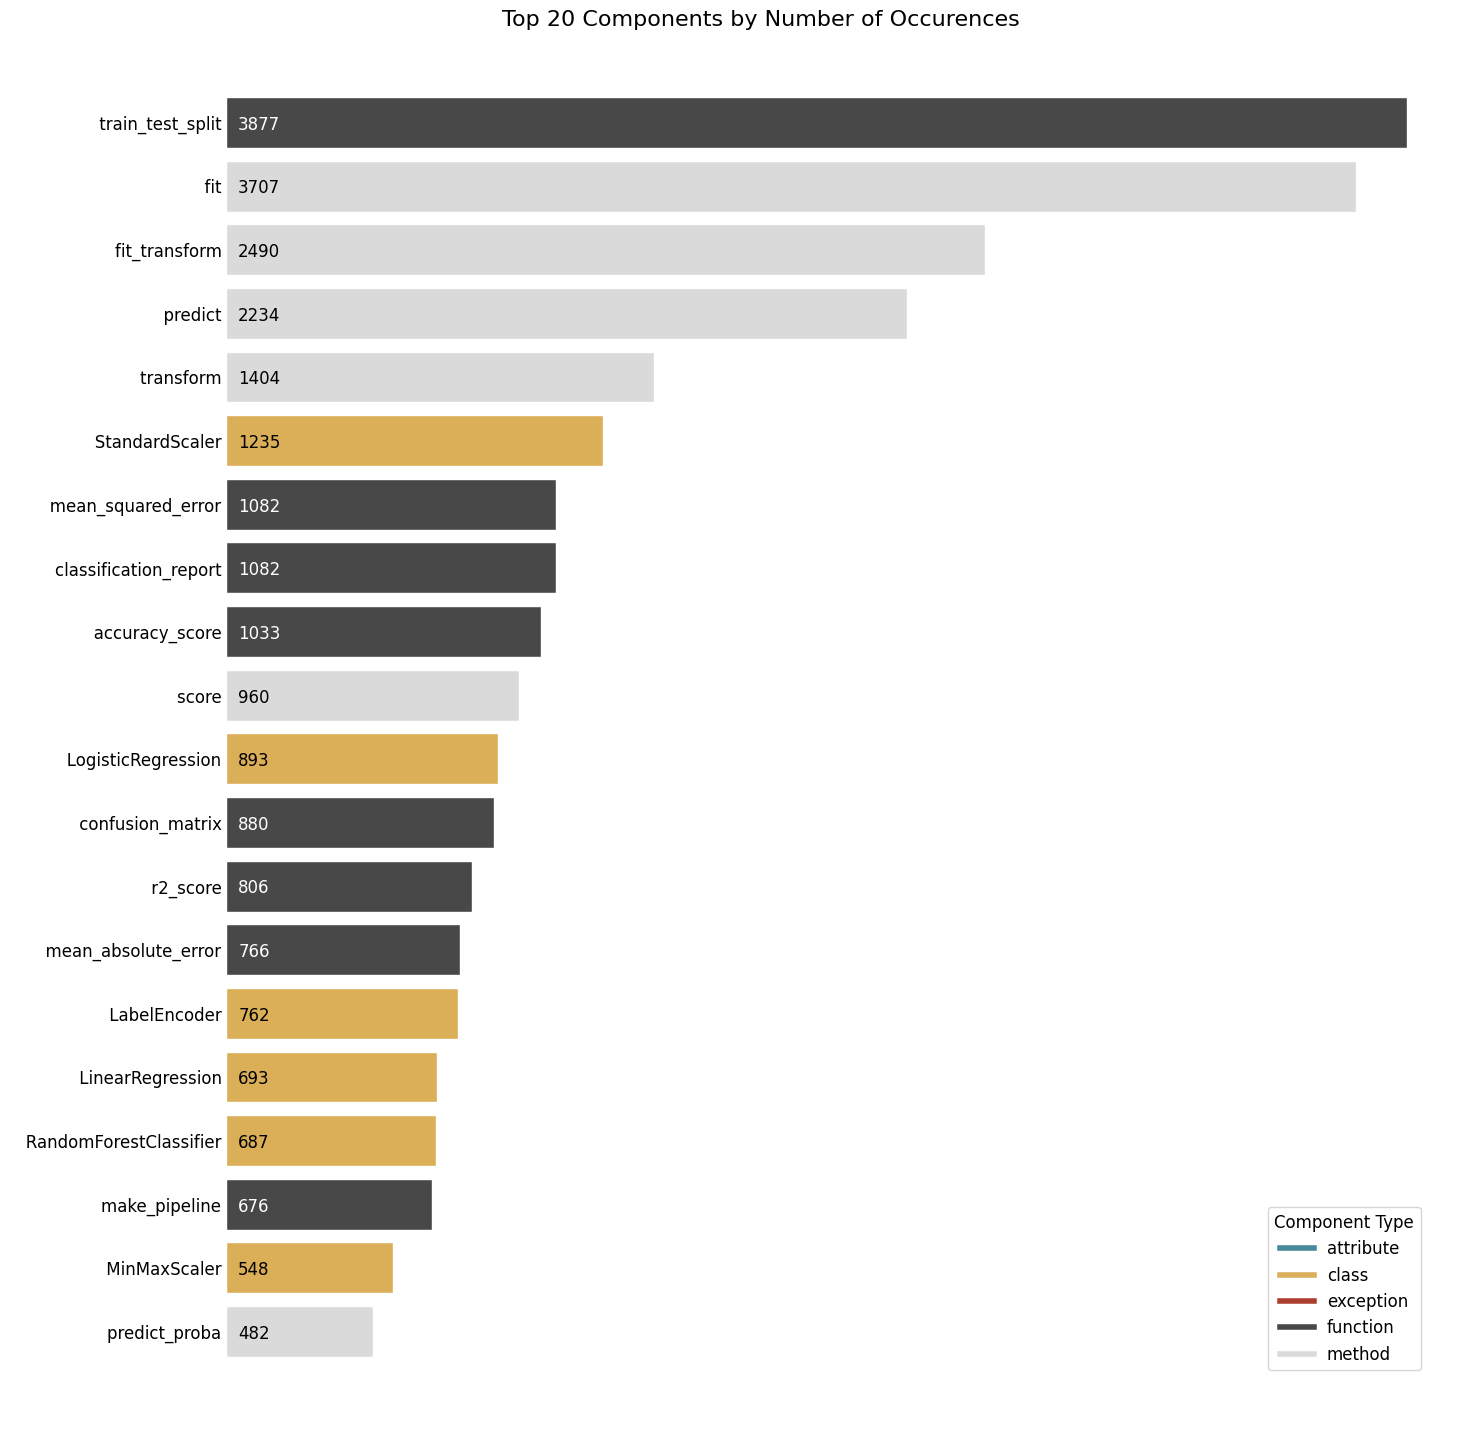

In [62]:
component_counts = count_component_occurrences(ipynb_df)
plot_component_popularity(component_counts, 'Top 20 Components by Number of Occurences', top_n=20)